# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section.


### Brief Description and Questions Regarding the Data

The dataset we have decided to use is the [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction). Alongisde this, the dataset I have decided to use in relation to our provided dataset is about the air quality in India from the years 2015-2019. This dataset can be found here: [India Air Quality](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india). The dataset I have found provides detailed statistics regarding the various Air Qualities across different cities in India. After Reviewing the data, here are a few questions I hope to be able to answer after full exploration of the two datasets:

- Can we create a combination of variables between the two datasets to accurately create an estimate of flight cost?
- Can we predict an accurate flight cost estimate based on the Air Quality Index?
- How does the number of flights contribute to Air Quality Index?


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

flights_df = pd.read_csv('flights.csv')
air_df = pd.read_csv('city_day.csv')

flights_df=flights_df.drop("Unnamed: 11", axis=1)
flights_df=flights_df.drop("Unnamed: 12", axis=1)
flights_df
# air_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4108
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4146
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7230
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12649


### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

In [119]:
#This gets the size of our newly created dataframes
print("Shape of Air::{}".format(air_df.shape))
print("Shape of flights::{}".format(flights_df.shape), '\n')

#This will show us the various datatypes of each variable
print("flights:\n", flights_df.dtypes, "\n\nair:\n", air_df.dtypes, "\n\n")

#Shows us some quick statistics on our data
print("flights:\n", flights_df.info(), "\n\nair:\n", air_df.info())

#We want to convert the dates to proper datetime format so we can more easily work with the data
flights_df['datetime'] = pd.to_datetime(flights_df.Date_of_Journey)
air_df['datetime'] = pd.to_datetime(air_df.Date)

#Shows us the span of dates the data covers
print("min year flights: ", min(flights_df.datetime), "max year flights: ", max(flights_df.datetime))
print("min year air: ", min(air_df.Date), "max year air: ", max(air_df.Date))

#
# print(flights_df.value_counts('datetime'))
# print(air_df.value_counts('Date'))


Shape of Air::(29531, 17)
Shape of flights::(10683, 12) 

flights:
 Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional Info            object
Price                       int64
datetime           datetime64[ns]
dtype: object 

air:
 City                  object
Date                  object
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
datetime      datetime64[ns]
dtype: ob

In [137]:
# Since our maximum years we are looking at is only 2019,
#   we want to trim our air quality dataframe to just that year
air19_df = air_df
air19_df = air19_df.loc[air19_df['Date'] > '2018-12-31']
air19_df = air19_df.loc[air19_df['Date'] < '2020-01-01']

print("Shape of air::{}".format(air19_df.shape), '\n')

print(flights_df.info())
print(air_df.info())
print(flights_df.value_counts("Source"))
print(flights_df.value_counts("Destination"))
print(air19_df.value_counts("City"))


Shape of air::(7446, 17) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  object        
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  datetime         10683 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1001.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

In [127]:
print(air19_df.value_counts("City"))
print(flights_df.value_counts("Destination"))

City
Ahmedabad             365
Amaravati             365
Thiruvananthapuram    365
Talcher               365
Patna                 365
Mumbai                365
Lucknow               365
Kolkata               365
Jorapokhar            365
Jaipur                365
Hyderabad             365
Visakhapatnam         365
Gurugram              365
Delhi                 365
Chennai               365
Brajrajnagar          365
Bengaluru             365
Amritsar              365
Guwahati              319
Coimbatore            203
Shillong              127
Chandigarh            121
Bhopal                106
dtype: int64
Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
dtype: int64


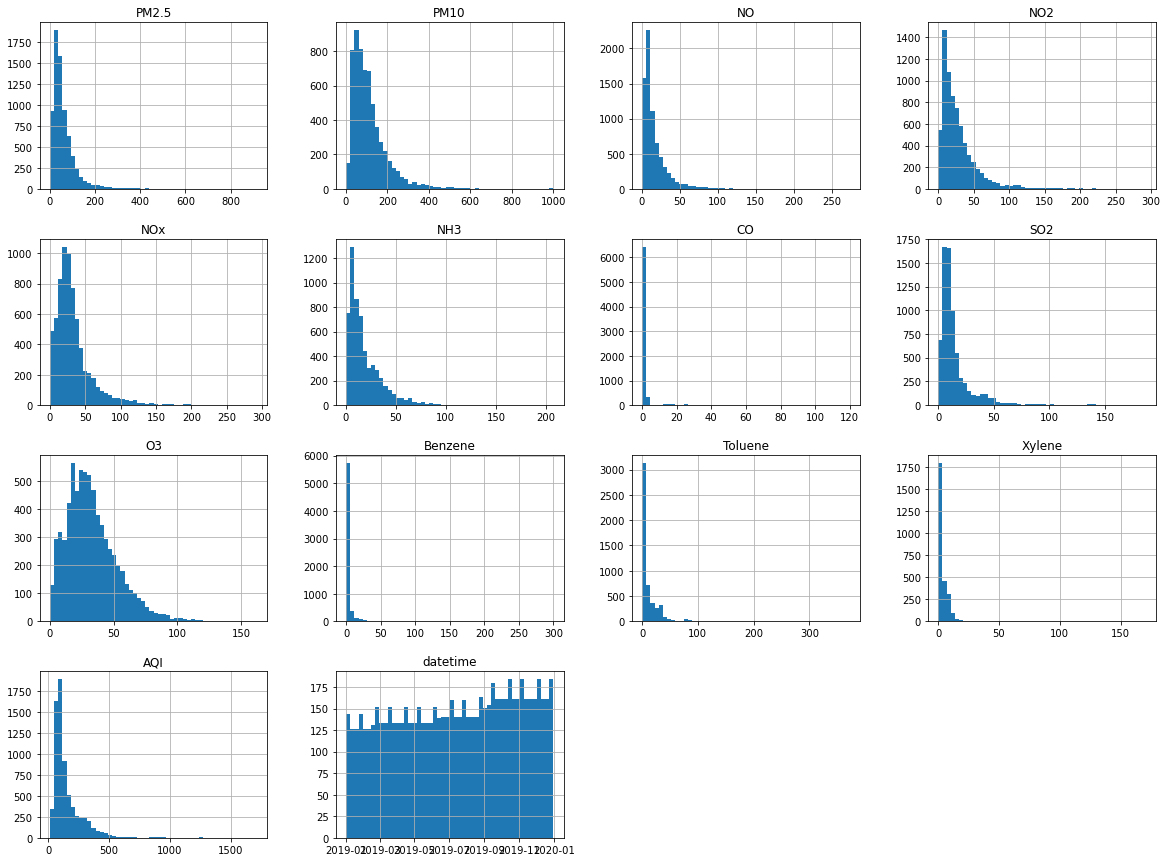

In [99]:
%matplotlib inline

air19_df.hist(bins = 50, figsize=(20,15))
plt.show()

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

(8486, 28)
City
Delhi      4537
Kolkata    2871
Mumbai      697
Chennai     381
dtype: int64


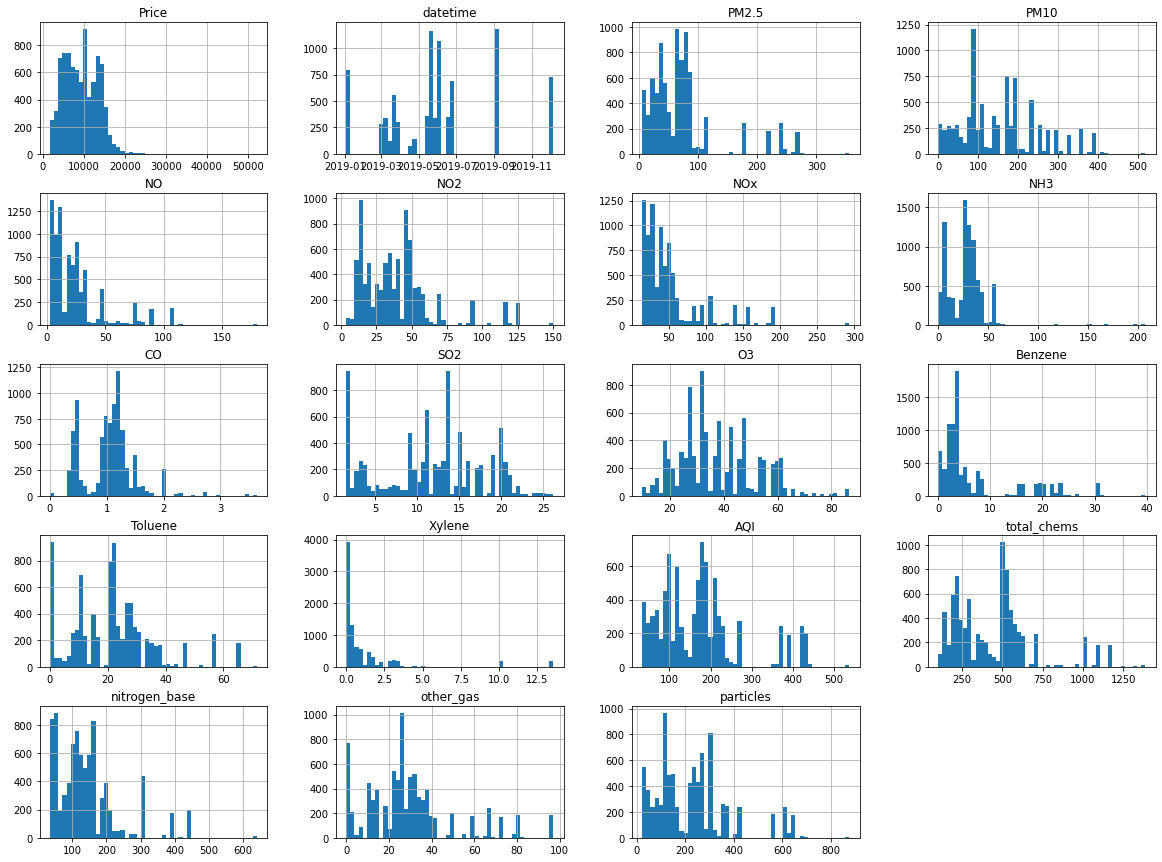

In [145]:
df1 = flights_df
df2 = air19_df

df2["NO"].fillna(0, inplace=True)
df2["PM2.5"].fillna(0, inplace=True)
df2["PM10"].fillna(0, inplace=True)
df2["NO2"].fillna(0, inplace=True)
df2["NOx"].fillna(0, inplace=True)
df2["CO"].fillna(0, inplace=True)
df2["SO2"].fillna(0, inplace=True)
df2["O3"].fillna(0, inplace=True)
df2["Benzene"].fillna(0, inplace=True)
df2["Toluene"].fillna(0, inplace=True)
df2["Xylene"].fillna(0, inplace=True)
df2["NH3"].fillna(0, inplace=True)
df2["AQI"].fillna(0, inplace=True)
df2["AQI_Bucket"].fillna(0, inplace=True)



res = df1.merge(df2, how='inner', left_on=['datetime', 'Source'], right_on=['datetime', 'City'])
print(res.shape)
print(res.value_counts("City"))

res['total_chems'] = res['NO'] + res['PM2.5']\
                 + res['PM10'] + res['NO2']\
                 + res['CO'] + res['SO2']\
                 + res['O3'] + res['Benzene']\
                 + res['Toluene'] + res['Xylene']\
                 + res['NOx'] + res['NH3']

res['nitrogen_base'] = res['NO'] + res['NO2'] + res['NH3'] + res['NOx']
res['other_gas'] = res['Xylene'] + res['Benzene'] + res['Toluene']
res['particles'] = res['PM10'] + res['PM2.5']

corrmatrix = res.corr()
corrmatrix["Price"].sort_values(ascending=False)

# dfnew['nitrogens'] = dfnew['NO'] + dfnew['NO2'] + dfnew['NO3'] + dfnew['NOx']
#
# corr_matrix = dfnew.corr()
# print(corr_matrix["Price"].sort_values(ascending=False))
# dfnew
%matplotlib inline

res.hist(bins = 50, figsize=(20,15))
plt.show()

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

### Relationships

- Target Variable: __Price__
- Predictor Variables: